<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Linear Algebra <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 3 <br>
<font color=3C99D size=5>
Diagonalization, Eigenvectors and Decomposition <br>
<font color=696880 size=4>
<!-- <br> -->
Mahdi Alinejad - Mahan Bayhaghi

____


<h3 style='color: green;'>Purpose</h3>
In this notebook, we will explore eigenvalues and eigenvectors, and demonstrate diagonalization of a matrix. We will also compare the performance of computing matrix powers using regular methods versus diagonalization.

<h3 style='color: green;'>Student Information</h3>

In [339]:
student_number = '401105561'
first_name = 'Moeein'
last_name = 'Aali'

<h3 style='color: green;'>Imports</h3>
import the necessary libraries.

In [340]:
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import timeit
from sympy import *
import math

<h3 style='color: green;'>Eigenvalues and Eigenvectors</h3>
Eigenvalues and eigenvectors are fundamental concepts in linear algebra. For a given square matrix A, if there is a non-zero vector v such that Av = λv, then λ is called the eigenvalue and v is the corresponding eigenvector.

<h3 style='color: green;'>Functions for Eigenvalues and Eigenvectors</h3>
We will define functions to compute eigenvalues and eigenvectors.

In [341]:
def compute_eigenvalues(A):
    a, b, c, d = A[0, 0], A[0, 1], A[1, 0], A[1, 1]
    trace = a + d
    det = a * d - b * c
    return [(trace + math.sqrt(trace**2 - 4 * det)) / 2, (trace - math.sqrt(trace**2 - 4 * det)) / 2]


def compute_eigenvector(A, eigenvalue):
    a, b, c, d = A[0, 0], A[0, 1], A[1, 0], A[1, 1]
    if b != 0:
        x = -1
        y = (a-eigenvalue)/b
    elif c != 0:
        y = -1
        x = (d-eigenvalue)/c
    return np.array([x, y]) / math.sqrt(x**2 + y**2)

def compute_eigenvectors(A):
    eigenvalues = compute_eigenvalues(A)
    return [compute_eigenvector(A, eigenvalues[0]), compute_eigenvector(A, eigenvalues[1])]

<h3 style='color: green;'>Visualization of Vectors</h3>
We will write a function to visualize vectors in 2D.

In [342]:
def plot_vectors(vectors, colors, labels, title):
    plt.figure()
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid()
    for vector, color, label in zip(vectors, colors, labels):
        plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.title(title)
    plt.show()


<h3 style='color: green;'>Example with a Random Matrix</h3>
We will generate a random 2D matrix with two independent eigenvectors and visualize them along with a random vector. Then we apply the transformation and plot them again.

### no need to change the below cells

In [343]:
def generate_valid_matrix():
    while True:
        A = np.random.rand(2, 2)
        eigenvalues = np.linalg.eigvals(A)
        if (np.all(np.isreal(eigenvalues)) and
            len(set(eigenvalues)) == 2 and
            np.all(np.abs(eigenvalues) > 0.33) and
            np.all(np.abs(eigenvalues) < 3)):
            return A

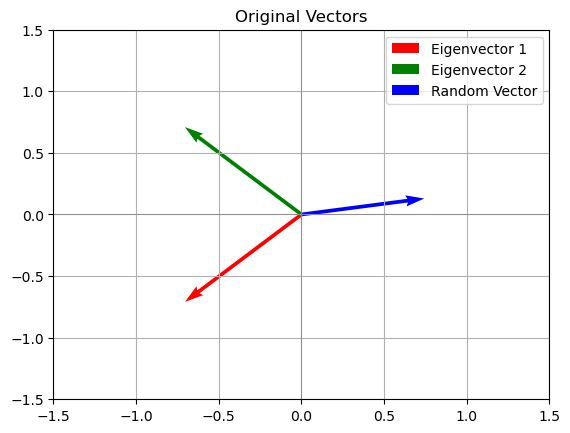

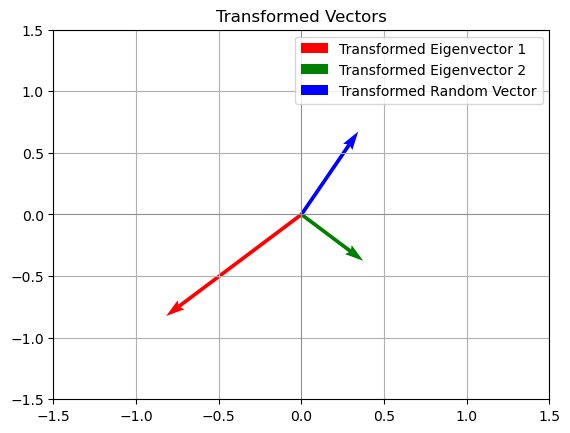

In [344]:
A = generate_valid_matrix()
eigenvectors = compute_eigenvectors(A)

random_vector = np.random.rand(2)

plot_vectors([eigenvectors[0], eigenvectors[1], random_vector],
             ['r', 'g', 'b'],
             ['Eigenvector 1', 'Eigenvector 2', 'Random Vector'],
             'Original Vectors')

transformed_vectors = [A @ eigenvectors[0],
                       A @ eigenvectors[1], A @ random_vector]

plot_vectors(transformed_vectors,
             ['r', 'g', 'b'],
             ['Transformed Eigenvector 1', 'Transformed Eigenvector 2',
                 'Transformed Random Vector'],
             'Transformed Vectors')

<h3 style='color: red;'>Question</h3>
explain this behavior of these vectors in 2D plain

<h3 style='color: yellow;'>Your answer</h3>

The direction of the eigenvectors, which are the green and red vectors, has not changed; only their length and orientation have changed while their direction remains fixed. However, the direction of the blue vector changes because it is not an eigenvector and, under transformation, it may become a combination of vectors that alters its direction.

<h3 style='color: green;'>Diagonalization</h3>
Diagonalization of a matrix involves finding a matrix P and a diagonal matrix D such that A = PDP^(-1). This is possible if A has n linearly independent eigenvectors.

In [345]:
def diagonalize(A):
    eigenvalues = compute_eigenvalues(A)
    mat = np.zeros((2, 2), dtype=float)
    mat[0, 0] = eigenvalues[0]
    mat[1, 1] = eigenvalues[1]
    return mat

to check your answer use the cells below

In [346]:
def check_diagonalization(D, A):
    is_diagonal = np.allclose(D, np.diag(np.diagonal(D)))
    eigenvalues_A = np.linalg.eigvals(A)
    diagonal_entries_D = np.diagonal(D)
    has_correct_diagonal = np.allclose(np.sort(eigenvalues_A), np.sort(diagonal_entries_D))
    has_all_eigenvalues = set(diagonal_entries_D) >= set(eigenvalues_A)

    if is_diagonal and has_correct_diagonal and has_all_eigenvalues:
        display(HTML('<font color="green">All conditions satisfied:</font> Matrix D properly diagonalizes matrix A.'))
    else:
        if not is_diagonal:
            display(HTML('<font color="red">Error:</font> Matrix D is not diagonal.'))
        if not has_correct_diagonal:
            display(HTML('<font color="red">Error:</font> Diagonal entries of D are not eigenvalues of A.'))
        if not has_all_eigenvalues:
            display(HTML('<font color="red">Error:</font> D does not include all eigenvalues of A.'))


In [347]:
A = generate_valid_matrix()

D = diagonalize(A)

check_diagonalization(D, A)

<h3 style='color: green;'>Properties of Diagonalized Matrix</h3>
A diagonalized matrix has its eigenvalues on the diagonal. It is easier to compute powers of a diagonal matrix.

<h3 style='color: red;'>Question</h3>
How do you think we can speed up the process of calculating powers of a matrix by using diagonalization?

<h3 style='color: yellow;'>Your answer:</h3>

The side matrices cancel each other out, and the middle matrix is diagonal, with the elements on the main diagonal being exponentiated. This means that instead of multiplying two high-order matrices, we exponentiate a diagonal matrix, which has a significantly lower computational complexity. Therefore, it should take much less time.

<h3 style='color: green;'>Performance Comparison</h3>
We will compare the time taken to compute matrix powers using regular methods versus diagonalization.

First, we will compute the powers of a matrix using the regular method.

In [348]:
def compute_powers(A, n):
    result = A
    for _ in range(n-1):
        result = result @ A
    return result

In [349]:
n_values = range(1, 200)

In [350]:
regular_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers(A, n))
    regular_times.append(timer.timeit(number=1))

Next, we will use your method for calculating power of a matrix.

In [351]:
def compute_powers_your_way(A, n):
    vals = compute_eigenvalues(A)
    vectors = compute_eigenvectors(A)
    DMat = np.zeros((2, 2), dtype=float)
    DMat[0, 0] = vals[0]
    DMat[1, 1] = vals[1]
    DMat = np.power(DMat, n)
    # TA said I can use linalg for Reverse
    return vectors @ DMat @ np.linalg.inv(vectors)

In [352]:
diagonal_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers_your_way(A, n))
    diagonal_times.append(timer.timeit(number=1))

Finally, we will plot the results to compare the performance of both methods.

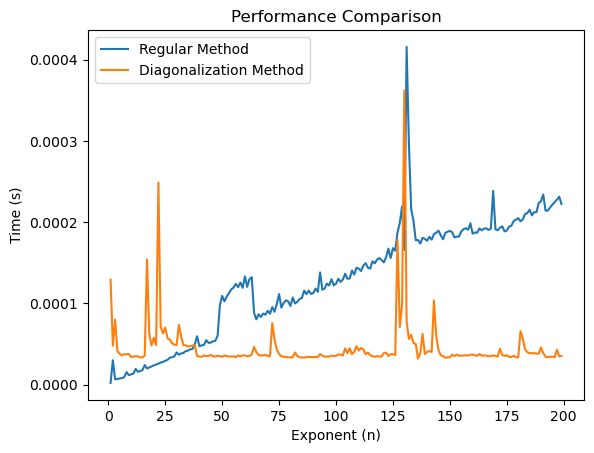

In [353]:
plt.plot(n_values, regular_times, label='Regular Method')
plt.plot(n_values, diagonal_times, label='Diagonalization Method')
plt.xlabel('Exponent (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Performance Comparison')
plt.show()

<h3 style='color: green;'>Background: </h3>

QR decomposition is a matrix factorization technique that decomposes a matrix
𝐴
into an orthogonal matrix
𝑄
and an upper triangular matrix
𝑅
R. The Gram-Schmidt process is a method for orthogonalizing a set of vectors in an inner product space, which forms the basis of this decomposition.

<h3 style='color: green;'>Gram-Schmidt Process: </h3>

A method to orthogonalize a set of vectors in an inner product space.

<h3 style='color: green;'>Theory: </h3>

Given a matrix
$ 𝐴 ∈ 𝑅^{𝑚 × 𝑛} $ , QR decomposition aims to find an orthogonal matrix
$ Q ∈ 𝑅^{𝑚 × 𝑛} $ and an upper triangular matrix  $ R ∈ 𝑅^{n × 𝑛} $ such that:
$ A = Q R $

**In the section below, implement QR decompostion step by step :**

In [354]:
def gram_schmidt(A):
    Q = np.zeros((A.shape[0], A.shape[1]))
    R = np.zeros((A.shape[1], A.shape[1]))
    for i in range(A.shape[1]):
        v = A[:, i]
        for j in range(i):
            R[j, i] = np.dot(Q[:, j].T, v)
            v = v - R[j, i] * Q[:, j]
        R[i, i] = np.sqrt(np.dot(v.T, v))
        Q[:, i] = v / R[i, i]
    return Q, R

Now, let's check if the decompostion. No need to change the following cell.

In [355]:
def test_QR_decomposition():
    A = np.random.random((4, 4))
    Q, R = gram_schmidt(A)
    print("Matrix A:")
    print(A)
    print("\nOrthogonal matrix Q:")
    print(Q)
    print("\nUpper triangular matrix R:")
    print(R)
    print(f"\nCheck A = QR: {np.allclose(A, np.dot(Q, R))}")
    print(f"\nCheck Q^T Q = I: {np.allclose(np.dot(Q.T, Q), np.eye(Q.shape[1]))}")

test_QR_decomposition()

Matrix A:
[[0.57673858 0.24451998 0.85230384 0.43692781]
 [0.97682511 0.25511446 0.14035602 0.81187305]
 [0.27856283 0.52068175 0.82228621 0.96371491]
 [0.21937617 0.90402108 0.38433808 0.97379458]]

Orthogonal matrix Q:
[[ 0.48526499 -0.0602933   0.6471513  -0.58487418]
 [ 0.82189582 -0.27644101 -0.45095099  0.21144938]
 [ 0.23438139  0.4121682   0.51077746  0.71713954]
 [ 0.18458202  0.86606147 -0.3419719  -0.31451905]]

Upper triangular matrix R:
[[1.18850235 0.61723864 0.79262173 1.28492265]
 [0.         0.91227926 0.58159226 0.98979978]
 [0.         0.         0.77684829 0.07587692]
 [0.         0.         0.         0.30096339]]

Check A = QR: True

Check Q^T Q = I: True


In this section, we will implement [Househodler reflection](https://en.wikipedia.org/wiki/Householder_transformation) method to compute QR decomposition.

<h3 style='color: green;'>Concept of Householder Reflections: </h3>

Householder reflections are used to zero out specific elements of a vector or matrix. A Householder reflection is defined by a vector
𝑣 and it generates a matrix  𝐻 such that:
$$ 𝐻 = 𝐼 − 2𝑣𝑣^𝑇 $$
where  𝑣 is a unit vector. This transformation is used to reflect a vector about a plane or hyperplane. When applied to a vector, it can zero out all elements below the first one, which is useful for transforming a matrix into an upper triangular form.

<h3 style='color: green;'>Using Householder Reflections for QR Decomposition: </h3>

The goal is to decompose a matrix
𝐴 into an orthogonal matrix 𝑄 and an upper triangular matrix 𝑅. Householder reflections are used to systematically zero out the sub-diagonal elements of
𝐴 transforming it into
𝑅. The orthogonal matrix
𝑄 is the product of all Householder matrices used in the process.

In [356]:
def norm(v):
  n = len(v)
  sum = 0.0
  for i in range(n):
    sum += v[i] * v[i]
  return np.sqrt(sum)

def householder_reflection(a):
    n = len(a)
    v = a.copy()
    print(v)
    v[0] = v[0] + a[0] * norm(a) / norm(a[0])
    norm_v = norm(v)
    return - 2 * np.outer(v/norm_v, v/norm_v) + np.eye(n)


def qr_householder(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for i in range(min(m, n)):
        v = R[i:, i]
        H = householder_reflection(v)
        R[i:, :] = H @ R[i:, :]
        Q[:, i:] = Q[:, i:] @ H
    return Q, R

Now, let's check if the decompostion.


In [357]:
test_QR_decomposition()

Matrix A:
[[0.73108711 0.4700157  0.89468132 0.73267122]
 [0.2292012  0.69430225 0.46383702 0.11645235]
 [0.70607794 0.68421633 0.60246282 0.77982287]
 [0.7882962  0.22000454 0.38988692 0.0341873 ]]

Orthogonal matrix Q:
[[ 0.55957088 -0.04031404  0.82720763  0.03134884]
 [ 0.17542959  0.81933716 -0.05817328 -0.54270338]
 [ 0.54042897  0.3113475  -0.37636668  0.68508933]
 [ 0.60335846 -0.47971256 -0.41314831 -0.48491536]]

Upper triangular matrix R:
[[1.30651388 0.88732018 1.14283828 0.87247673]
 [0.         0.65740951 0.34451233 0.29227263]
 [0.         0.         0.32527624 0.29167304]
 [0.         0.         0.         0.47743968]]

Check A = QR: True

Check Q^T Q = I: True


<h3 style='color: green;'> Calculating Eigenvalues Using QR Decomposition </h3>

Eigenvalues and eigenvectors are fundamental concepts in linear algebra, playing a crucial role in various mathematical and scientific applications. One efficient method to compute eigenvalues of a matrix is through QR decomposition. In this section, we will use QR decomposition to estimate eigenvalues and eigenvectors.

The QR algorithm utilizes QR decomposition iteratively to approximate eigenvalues of $ A $. Here’s a step-by-step outline of how this process works:

1. **Initial Setup:**
   - Start with a square matrix $ A $.

2. **QR Decomposition Iteration:**
   - Decompose $ A $ into $ Q $ and R such that:

     $$ A^{(0)} = Q^{(0)} R^{(0)} $$

   - Update $ A $ iteratively:

     $$ A^{(k)} = R^{(k-1)} Q^{(k-1)} $$
   - Convergence is typically checked by ensuring $ A^{(k)} $ becomes increasingly upper triangular or converges to a diagonal matrix.

3. **Extracting Eigenvalues:**
   - After convergence, the diagonal elements of the upper triangular matrix $ A^{(k)} $ are the eigenvalues of $ A $.

In [358]:
def qr_algorithm(A, num_iterations=1000, tol=1e-10):
    A = A.copy()
    n = A.shape[0]
    Q_total = np.eye(n)
    for _ in range(num_iterations):
        Q, R = np.linalg.qr(A)
        A = R @ Q
        Q_total = Q_total @ Q
        if np.allclose(A, np.diag(np.diagonal(A)), atol=tol):
            break
    eigenvalues = np.diag(A)
    return eigenvalues, Q_total

def compute_eigenvectors(A, eigenvalues):
    n = A.shape[0]
    eigenvectors = np.zeros((n, n))

    for i, eigenvalue in enumerate(eigenvalues):
        eig_matrix = A - np.eye(n) * eigenvalue
        _, _, vh = np.linalg.svd(eig_matrix)
        eigenvectors[:, i] = vh[-1]

    return eigenvectors

Let's verify our results. no need to change the following cell.

In [359]:
def test_qr_algorithm():
    A = np.random.random((4,4))
    eigenvalues, Q_total = qr_algorithm(A)

    eigenvectors = compute_eigenvectors(A, eigenvalues)
    print("Matrix A:")
    print(A)
    print("\nEigenvalues (QR Algorithm):")
    print(eigenvalues)
    print("\nEigenvectors (QR Algorithm):")
    print(eigenvectors)

    # Verify the results
    print("\nVerification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):")
    print(np.allclose(A @ eigenvectors, A @ eigenvectors))

    # Compare with NumPy's eig function
    np_eigenvalues, np_eigenvectors = np.linalg.eig(A)
    np_eigenvalues = np_eigenvalues.real

    print("\nEigenvalues (NumPy):")
    print(np_eigenvalues)

    print("\nEigenvectors (NumPy):")
    print(np_eigenvectors)

    print("\nVerification with NumPy (Eigenvalues):")
    print(np.allclose(np.sort(eigenvalues), np.sort(eigenvalues)))

test_qr_algorithm()

Matrix A:
[[0.10223547 0.91466889 0.42197605 0.11821284]
 [0.75905713 0.80525174 0.58720503 0.35192302]
 [0.96251175 0.51848793 0.07934977 0.49362381]
 [0.45472244 0.64670139 0.94976604 0.25931601]]

Eigenvalues (QR Algorithm):
[ 2.11358317 -0.70459871 -0.26254705  0.09971559]

Eigenvectors (QR Algorithm):
[[-0.39396096  0.30452004 -0.38840312 -0.36127152]
 [-0.58211641 -0.0009381   0.24339094 -0.18295379]
 [-0.46531922 -0.74609741 -0.41236828  0.14586239]
 [-0.53797144  0.59211935  0.78730951  0.9026267 ]]

Verification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):
True

Eigenvalues (NumPy):
[ 2.11358317 -0.70459871 -0.26254705  0.09971559]

Eigenvectors (NumPy):
[[-0.39396096 -0.30452004  0.38840312 -0.36127152]
 [-0.58211641  0.0009381  -0.24339094 -0.18295379]
 [-0.46531922  0.74609741  0.41236828  0.14586239]
 [-0.53797144 -0.59211935 -0.78730951  0.9026267 ]]

Verification with NumPy (Eigenvalues):
True


<h3 style='color: green;'> Conclusion: </h3>


QR decomposition offers a powerful method for computing eigenvalues numerically. Its iterative nature makes it suitable for matrices of varying sizes and complexities, providing a robust approach to solving eigenvalue problems in practice.
